In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_excel(r'C:\Users\Kristine\.ipynb_checkpoints\table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', header = 4)


In [3]:
df1['Population2_float'] = df1['Population'] * df1['Population']
df1['Population2'] = df1['Population'] * df1['Population']

In [4]:
df1.Population2 = df1.Population2.apply(lambda value:"{:,}".format(value))


In [5]:
df1.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Population2_float,Population2
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,3.463321e+06,"3,463,321.0"
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,6.640929e+06,"6,640,929.0"
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,8.099716e+06,"8,099,716.0"
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN,9.595378e+09,"9,595,377,936.0"
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN,4.080654e+07,"40,806,544.0"


In [6]:
df1['Murder_cat'] = df1['Murder and\nnonnegligent\nmanslaughter'].apply(lambda x: 1 if x > 0 else 0)
df1['Robbery_cat'] = df1['Robbery'].apply(lambda x: 1 if x > 0 else 0)

In [7]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model



In [8]:
df1 = df1.fillna(0)

In [9]:
df1[df1['Property\ncrime'] > 100000]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Population2_float,Population2,Murder_cat,Robbery_cat
216,New York,8396126.0,52384.0,335.0,0.0,1112.0,19170.0,31767.0,141971.0,16606.0,117931.0,7434.0,0.0,7.049493e+13,"70,494,931,807,876.0",1,1


In [10]:
df1 = df1[df1['Property\ncrime'] < 140000]

In [11]:
df1.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Population2_float,Murder_cat,Robbery_cat
count,350.000000,350.000000,350.000000,350.0,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.00000,350.000000,3.500000e+02,350.000000,350.000000
mean,15819.914286,50.774286,0.600000,0.0,2.654286,17.714286,29.805714,382.445714,71.554286,296.431429,14.46000,1.000000,9.773906e+08,0.137143,0.594286
std,27003.784914,235.695466,3.691545,0.0,10.697611,94.577805,128.258702,1030.529244,263.884333,712.686306,67.40416,7.862355,5.046227e+09,0.344491,0.491733
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000
25%,2928.500000,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,39.000000,6.000000,30.250000,0.00000,0.000000,8.576929e+06,0.000000,0.000000
50%,7106.000000,6.000000,0.000000,0.0,0.000000,1.000000,4.000000,111.500000,17.000000,93.500000,2.00000,0.000000,5.049527e+07,0.000000,1.000000
75%,18095.500000,21.000000,0.000000,0.0,2.000000,5.000000,14.000000,339.250000,50.750000,280.750000,7.00000,0.000000,3.274528e+08,0.000000,1.000000
max,258789.000000,3249.000000,47.000000,0.0,145.000000,1322.000000,1735.000000,12491.000000,3458.000000,8076.000000,957.00000,132.000000,6.697175e+10,1.000000,1.000000


In [12]:
data = df1

#𝑃𝑟𝑜𝑝𝑒𝑟𝑡𝑦𝑐𝑟𝑖𝑚𝑒=𝛼+𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛+𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛2+𝑀𝑢𝑟𝑑𝑒𝑟+𝑅𝑜𝑏𝑏𝑒𝑟𝑦

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Property\ncrime']
X = data[['Population','Population2_float','Murder_cat', 'Robbery_cat']]
regr.fit(X, Y)


# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [1.29451936e-02 1.14945770e-07 1.95109532e+02 9.25226499e+01]

Intercept: 
 -16.43582645343554

R-squared:
0.8446772194251171


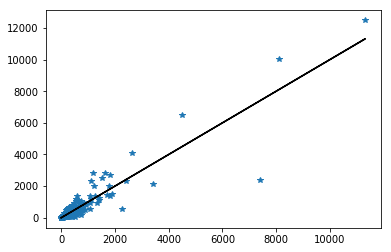

In [13]:
import matplotlib.pyplot as plt
from pylab import polyfit, poly1d
y = Y
x = regr.predict(X)
#x, y = zip(*samples)

fit = polyfit(x, y, 1)
fit_fn = poly1d(fit)
plt.plot(x,y, '*', x, fit_fn(x), 'k')

plt.show()

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, X, Y, cv=10)

array([ 0.76249344,  0.9377374 ,  0.3034286 ,  0.8285753 ,  0.76062753,
        0.79765923,  0.55798078,  0.902878  ,  0.83883077, -2.04124732])

In [15]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))

With 20% Holdout: 0.6010616892508243


In [16]:
import statsmodels.formula.api as smf

In [17]:
df1.columns = ['City', 'Population', 'Violent_crime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property_crime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3',
       'Population2_float', 'Population2', 'Murder_cat', 'Robbery_cat']

Second OLS model

In [21]:
data = df1

#𝑃𝑟𝑜𝑝𝑒𝑟𝑡𝑦𝑐𝑟𝑖𝑚𝑒=𝛼+𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛+𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛2+𝑀𝑢𝑟𝑑𝑒𝑟+𝑅𝑜𝑏𝑏𝑒𝑟𝑦

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Property_crime']
X = data[['Violent_crime','Population2_float','Murder_cat', 'Robbery_cat']]
regr.fit(X, Y)


# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [3.56519787e+00 2.02245557e-08 1.41365993e+02 2.11513341e+02]

Intercept: 
 36.571354121210334

R-squared:
0.9065795833580227


In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, X, Y, cv=10)

array([ 0.85379736,  0.93875126,  0.45247515,  0.55757863,  0.46924838,
        0.09086295,  0.81597775,  0.95605389,  0.9225577 , -0.49408614])

In [23]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))

With 20% Holdout: 0.654812606571533


In [37]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
x = data[['Violent_crime','Population2_float','Murder_cat', 'Robbery_cat']]
y = data['Property_crime']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(knn.fit(X_train, y_train).score(X_test, y_test)))



With 20% Holdout: 0.6752284022828944


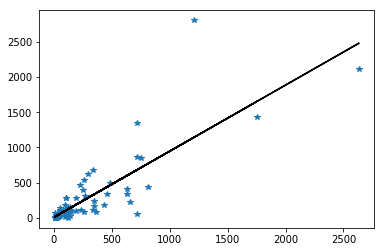

In [38]:
import matplotlib.pyplot as plt
from pylab import polyfit, poly1d
y_pred = knn.predict(X_test)


fit = polyfit(y_pred, y_test, 1)
fit_fn = poly1d(fit)
plt.plot(y_pred, y_test, '*', y_pred, fit_fn(y_pred), 'k')

plt.show()